**Нейросеть на базе Keras**

Обучение с учителем

Прогнозирование 1 переменной, через разложение её временного ряда

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

import pylab

import matplotlib.pyplot as plt

import math

import keras as k
from keras import layers
from tensorflow.keras.layers import Dense

import tensorflow as tf

from sklearn.model_selection import train_test_split

# Ввод статистики

In [2]:
# ------------ Источник ------------ #

df_url = "https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/Stat_wheat/Statistics_nonfilter_all536_3binYs.txt"

df_name = "Statistics"

df = pd.read_csv(df_url,
               sep='\t', 
               error_bad_lines=False,
               decimal=',',
               encoding='gbk', 
               skiprows=1)

In [3]:
# ------------ Параметры данных ------------ #

dates = df.iloc[:, 0:1]
df_X = df.iloc[:, 4:5]
Y = df.iloc[:, 28:31]               ###########

df_length = len(df)
df_width = len(df.columns)

In [4]:
X = df_X / 1000000

In [5]:
step = 20

In [6]:
# X = np.array(X.astype(np.float32))
# Y = np.array(Y.astype(np.int32))                  ###########

In [7]:
input_train = []
output_train = []

train_x = []
train_y = []

for i in range((len(X)//step)*step - step - 1):
    x = np.array(X.iloc[i: i + step])
    y = np.array([X.iloc[i + step + 1]], np.float64)
    input_train.append(x)
    output_train.append(y)
train_x = np.array(input_train)
train_y = np.array(output_train)

In [8]:
print(train_x[0])
print(train_y[0])

[[0.379518]
 [0.391217]
 [0.405267]
 [0.410207]
 [0.401394]
 [0.399195]
 [0.400991]
 [0.40279 ]
 [0.412481]
 [0.433387]
 [0.443065]
 [0.443971]
 [0.448159]
 [0.420506]
 [0.398269]
 [0.394585]
 [0.404642]
 [0.416615]
 [0.433887]
 [0.439772]]
[[0.447368]]


# Обработка

16/16 [==============================] - 1s 6ms/step - loss: 9.6161e-04 - accuracy: 0.0000e+00
[0.0009616099414415658, 0.0]


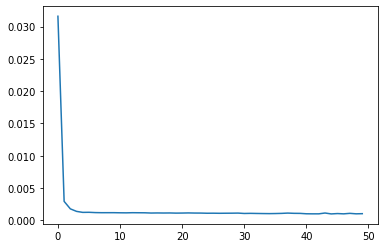

In [9]:
abc = []

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(40, input_shape=(20, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(40))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer="adam", loss="mean_squared_error", metrics='accuracy')

abc = model.fit(train_x, train_y, epochs=50, verbose=0)

print(model.evaluate(train_x, train_y))
plt.plot(abc.history['loss'])
plt.show()

# Результаты

In [10]:
yyy = []
for i in range(len(train_y)):
    yyy.append(train_y[i][0])
train_y = yyy

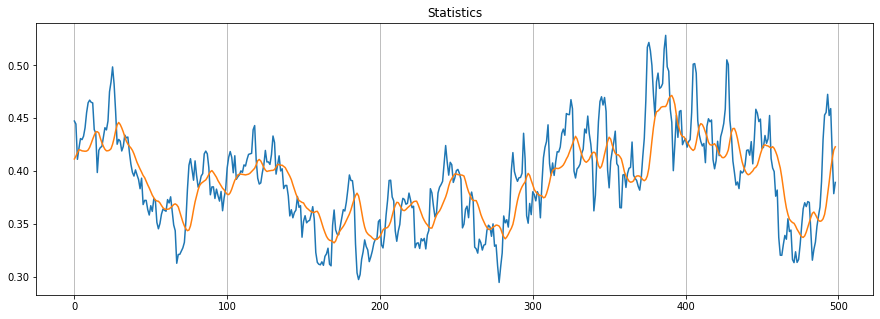

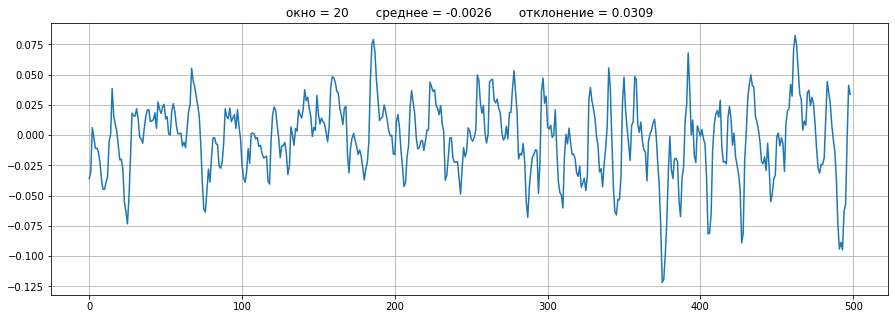

In [11]:
prx = model.predict(train_x)
middle = []
middle = prx-train_y

plt.figure(figsize=(15,5))
plt.grid(axis = 'x')
plt.title(df_name)
plt.plot(train_y)
plt.plot(prx)
plt.show()

plt.figure(figsize=(15,5))
plt.grid()
plt.title("окно = " + str(step) + "       среднее = " + str(round(np.mean(middle),4)) + "       отклонение = " + str(round(np.std(middle),4)))
plt.plot(middle)
plt.show()

In [12]:
prx[0:10]

array([[0.41147956],
       [0.41417354],
       [0.41735312],
       [0.42024425],
       [0.4199051 ],
       [0.4191724 ],
       [0.41894338],
       [0.41878882],
       [0.418963  ],
       [0.4199635 ]], dtype=float32)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20, 40)            6720      
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 19,721
Trainable params: 19,721
Non-trainable params: 0
_________________________________________________________________


# Старое

In [9]:
# model = k.Sequential()
# # model.add(k.layers.Dense(units=4, input_shape=(10, 1), activation='relu'))
# # # model.add(k.layers.Dense(units=8, activation='relu'))
# # model.add(k.layers.Dense(units=1, activation='relu'))

# # #############
# model.add(k.layers.LSTM(20, input_shape=(30, 1), return_sequences=True))
# # model.add(k.layers.Dense(units=15, input_shape=(10, 1), activation='linear'))
# # model.add(k.layers.Dense(units=15, activation='linear'))
# model.add(k.layers.LSTM(20))
# model.add(k.layers.Dense(1, activation='relu'))

# model.compile(optimizer="sgd", loss="mean_squared_error")

# fit_results = model.fit(train_x, train_y, epochs=100, verbose=0)

# print(model.evaluate(test_x, test_y))

# #############
# # optimizer=k.optimizers.Adam(0.001)
# # optimizer='sgd'
# # loss = "binary_crossentropy"
# # loss='mse'
# # model.compile(loss='binary_crossentropy', optimizer=k.optimizers.Adam(0.01), metrics=['accuracy'])
# # fit_results = model.fit(train_x, train_y, epochs=100, validation_split=0.2, verbose=0)

# # plt.plot(fit_results.history['accuracy'])
# # plt.plot(fit_results.history['val_accuracy'])
# # plt.grid(1)
# plt.show()

KeyboardInterrupt: ignored

In [ ]:
# model = k.Sequential()
# model.add(k.layers.Dense(50, activation=tf.nn.relu))
# model.add(k.layers.Dense(50, activation=tf.nn.relu))
# model.add(k.layers.Dense(1, activation=tf.nn.relu))

# model.compile(optimizer="adam", loss="mean_squared_error")
# fit_results = model.fit(train_x, train_y, epochs=100)

In [ ]:
# start = "2003-01-01"
# end = "2018-01-01"

# hist.get_stock_data("AAPL", start_date=start, end_date=end)
# process = DataProcessing("stock_prices.csv", 0.9)
# process.gen_test(10)
# process.gen_train(10)

# X_train = process.X_train.reshape((3379, 10, 1)) / 200
# Y_train = process.Y_train / 200

# X_test = process.X_test.reshape(359, 10, 1) / 200
# Y_test = process.Y_test / 200

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.LSTM(20, input_shape=(10, 1), return_sequences=True))
# model.add(tf.keras.layers.LSTM(20))
# model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

# model.compile(optimizer="adam", loss="mean_squared_error")

# model.fit(X_train, Y_train, epochs=50)

# print(model.evaluate(X_test, Y_test))

# data = pdr.get_data_yahoo("AAPL", "2017-12-19", "2018-01-03")
# stock = data["Adj Close"]
# X_predict = np.array(stock).reshape((1, 10, 1)) / 200

# print(model.predict(X_predict)*200)

# # If instead of a full backtest, you just want to see how accurate the model is for a particular prediction, run this:
# # data = pdr.get_data_yahoo("AAPL", "2017-12-19", "2018-01-03")
# # stock = data["Adj Close"]
# # X_predict = np.array(stock).reshape((1, 10)) / 200
# # print(model.predict(X_predict)*200)